<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade2/atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Processamento de Áudio com Python

Nesta atividade, você irá criar funções e verificar, de forma gráfica e auditiva, o efeito de alguns processamentos sobre sinais de áudio.

In [137]:
import numpy as np # para usar funções que lidam com vetores
import matplotlib.pyplot as plt # para desenhos
from scipy.io import wavfile
from IPython.display import (Audio, display, clear_output) # widget com os botões de play, volume e download
import math
from scipy.io.wavfile import read
import wave, sys

1) Criar uma função para gerar um tom senoidal.

Parâmetros de entrada: frequência (Hz), duração (s), amplitude (0 a 1) e frequência de amostragem (Hz).

Verfique se a frequência da saída está correta medindo um período do sinal.
___

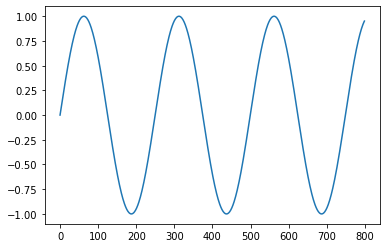

In [138]:
#funcao que gera um tom senoidal
def tonegen(freq:int, duration: float, amplitude: float, Fs: int):
  #parametros do linspace (inicio, fim, numero de amostras)
  t = np.linspace(0., duration, int(Fs * duration))
  #criando o sinal senoidal com sin()
  x = np.sin(freq * amplitude * np.pi * t)
  return x

#funcao que toca o tom senoidal
def play(tom, Fs: int):
  #criando o widget de audio com display()
  display(Audio(data = tom, rate=Fs, autoplay=True))
  
s440 = tonegen(freq = 80, duration = 0.1, amplitude = 0.8, Fs = 8000)
play(tom = s440, Fs = 8000)
#arrumar play

plt.plot(s440)
plt.show()

2) Criar uma função que receba um vetor com uma sequência de dígitos e gere tons DTMF correspondentes. Os parâmetros de entrada da função são: sequência de dígitos, duração em segundos de cada dígito, intervalo em segundos entre cada dígito e amplitude (0 a 1). O sinal de saída deve ter frequência de amostragem de 8 kHz.

Para verificar se o sinal está correto, teste a saída usando um decodificador DTMF, como os listados:
- online: DialABC http://dialabc.com/sound/
- Android DTMF Transceiver https://play.google.com/store/
- Android DTMF Decoder https://play.google.com/store/
- OcenAudio, em Análise/Detectar tons DTMF

In [139]:
DTMF_TABLE = {
    '1': {'dtmf1': 697, 'dtmf2': 1209},
    '2': {'dtmf1': 697, 'dtmf2': 1336},
    '3': {'dtmf1': 693, 'dtmf2': 1477},
    'A': {'dtmf1': 697, 'dtmf2': 1633},

    '4': {'dtmf1': 770, 'dtmf2': 1209},
    '5': {'dtmf1': 770, 'dtmf2': 1336},
    '6': {'dtmf1': 770, 'dtmf2': 1477},
    'B': {'dtmf1': 770, 'dtmf2': 1633},
          
    '7': {'dtmf1': 852, 'dtmf2': 1209},
    '8': {'dtmf1': 852, 'dtmf2': 1336},
    '9': {'dtmf1': 852, 'dtmf2': 1477},
    'C': {'dtmf1': 852, 'dtmf2': 1633},

    '*': {'dtmf1': 941, 'dtmf2': 1209},
    '0': {'dtmf1': 941, 'dtmf2': 1336},
    '#': {'dtmf1': 941, 'dtmf2': 1477},
    'D': {'dtmf1': 941, 'dtmf2': 1633},
}

def dtmfgen(sequency: np.array, duration: np.float, delay: np.float, amplitude: np.float):
    """
    Function which generate DTMF tone (samples) to one specific character
    :number: Represents the character to be converted to DTMF tone
    :duration: Duration of each tone in seconds
    :delay: Duration of delay between each tone in seconds
    :amplitude: Amplitude of each tone
    #https://github.com/cleversonahum/dtmf-generator/blob/main/dtmf-generator.py
    """
    Fs = 8000 #Sample frequency used to generate the signal in Hz
    y = sequency[0]
    time_tone = np.arange(0, duration, (1 / Fs))
    time_delay = np.arange(0, delay, (1 / Fs))
    x = [0]
    print(y)
    #varrer vetor sequency e armazenar valores de dtmf1 e dtmf2
    for x in range (len(sequency)):
      fr_1 = DTMF_TABLE[int(sequency[x])]['dtmf1'] #primeira freq do char
      fr_2 = DTMF_TABLE[int(sequency[x])]['dtmf2'] #segunda freq do char
      print(fr_1, fr_2)

s981 = dtmfgen(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 0.1, 40e-3, 0.7)
plt.plot(s981)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


KeyError: ignored

3) Criar uma função para remover uma em cada duas amostras de um sinal, criando um novo sinal que tem somente as amostras de índice ímpar do sinal original.

In [141]:
#funcao que remove elementos de índice par de uma lista
def halfsp(sample):
  half_sample = sample[::2] #using slice
  return half_sample

x = np.array([7, 3, 9, 1, 0, 4]) #sinal amostrado
half_sample = halfsp(x)
print(half_sample)
#resultado esperado: [7 9 0]

[7 9 0]


4) Criar uma função para criar um novo sinal que insere uma nova amostra entre cada duas amostras. Essa nova amostra é a média das duas amostras vizinhas.

In [142]:
#funcao que insere uma nova sample a cada duas num array, nova sample é media das duas vizinhas
def doublesp(sample):
  #criando um array
    ds = np.array([])
    for i in range(0,sample.size-1):
        mean = (sample[i]+sample[i+1])/2
        ds = np.append(ds,[sample[i],mean])
    ds = np.append(ds,sample[i+1]) 
    return ds

x=np.array([7, 3, 9, 1, 0, 4])
double_sample=doublesp(x)
print(double_sample)
#próximo passo: retirar os pontos
#[7 5 3 6 9 5 1 0.5 0 2 4]


[7.  5.  3.  6.  9.  5.  1.  0.5 0.  2.  4. ]


5) Gere um tom de 220 Hz. Aplique a função `halfsp`. Escute o resultado antes e depois da aplicação. O que ocorre na frequência e no tempo? Mostre graficamente o resultado na frequência através da transformada de Fourier (implementada pela função `numpy.fft`).
___

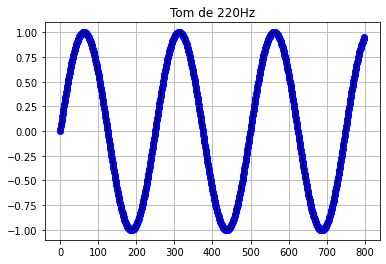

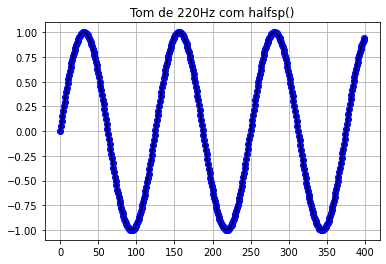

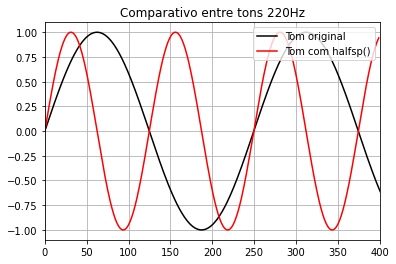

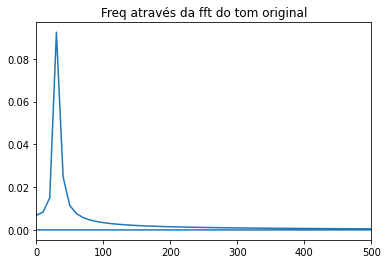

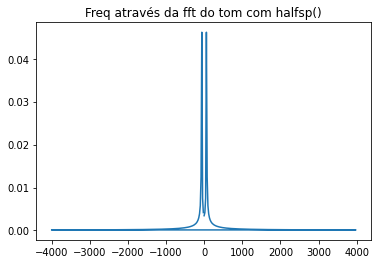

In [143]:
s220 = tonegen(80, 0.1, 0.8, 8000)  #gerando o tom de 220Hz
#plotando
plt.plot(s220,'bo', s220, 'k')
plt.grid()
plt.title('Tom de 220Hz')
plt.show()
#dando play no tom
play(s220, Fs = 8000)
#arrumar play

half_sample_s220 = halfsp(s220) #removendo indices pares da lista
#plotando
plt.plot(half_sample_s220,'bo', half_sample_s220, 'k')
plt.grid()
plt.title('Tom de 220Hz com halfsp()')
plt.show()
#dando play no tom
play(half_sample_s220, Fs = 8000)

plt.xlim(0,400)
plt.plot(s220,'k', half_sample_s220, 'r')
plt.grid()
plt.legend(('Tom original', 'Tom com halfsp()'),
           loc='upper right')
plt.title('Comparativo entre tons 220Hz')
plt.show()

#vendo a fft dos tons
#np.fft.ftt: Compute the one-dimensional discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm

s220_fft=np.fft.fft(s220) #fft de s220
ns=s220_fft.size
fs_220=np.fft.fftfreq(ns,1/8000) #Return the Discrete Fourier Transform sample frequencies.

half_sample_s220_fft=np.fft.fft(half_sample_s220) #fft de s220 half sample
nh=half_sample_s220_fft.size
fs_half_sample_220=np.fft.fftfreq(nh,1/8000) #Return the Discrete Fourier Transform sample frequencies.

plt.xlim(0,500)

#plot(frequencia, fft)
plt.plot(fs_220,abs(s220_fft)/4000)
plt.title('Freq através da fft do tom original')
plt.show()

plt.plot(fs_half_sample_220,abs(half_sample_s220_fft)/4000)
plt.title('Freq através da fft do tom com halfsp()')
plt.show()


6) Faça a mesma análise no tempo e frequência em relação à função `doublesp`.

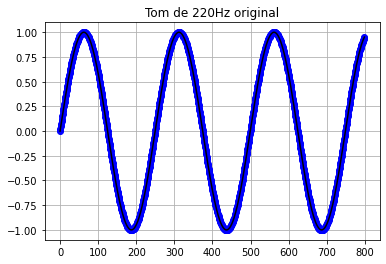

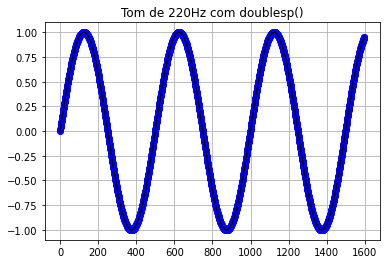

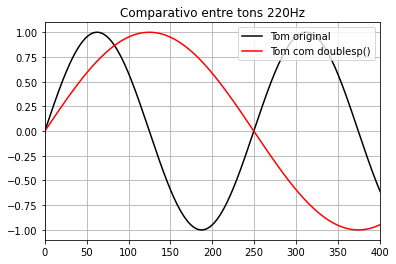

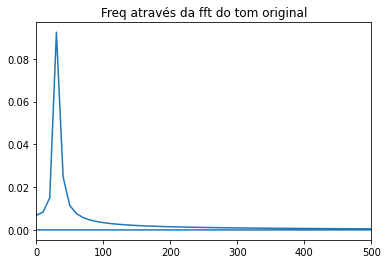

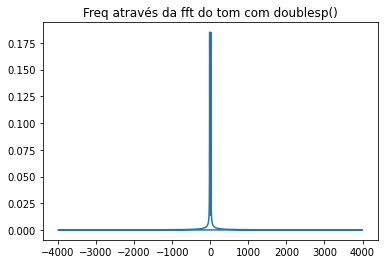

In [144]:
s220 = tonegen(80, 0.1, 0.8, 8000)  #gerando o tom
#plotando
plt.plot(s220,'bo', s220, 'k')
plt.grid()
plt.title('Tom de 220Hz original')
plt.show()
#dando play no tom
play(s220, Fs = 8000)
#arrumar play

double_sample_s220 = doublesp(s220) #removendo indices par da lista
#plotando
plt.plot(double_sample_s220,'bo', double_sample_s220, 'k')
plt.grid()
plt.title('Tom de 220Hz com doublesp()')
plt.show()
#dando play no tom
play(double_sample_s220, Fs = 8000)
#arrumar play

plt.xlim(0,400)
plt.plot(s220,'k', double_sample_s220, 'r')
plt.grid()
plt.legend(('Tom original', 'Tom com doublesp()'),
           loc='upper right')
plt.title('Comparativo entre tons 220Hz')
plt.show()

#vendo a fft dos tons
#np.fft.ftt: Compute the one-dimensional discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm

s220_fft=np.fft.fft(s220) #fft de s220
ns=s220_fft.size
fs_220=np.fft.fftfreq(ns,1/8000) #Return the Discrete Fourier Transform sample frequencies.

double_sample_s220_fft=np.fft.fft(double_sample_s220) #fft de s220 half sample
nh=double_sample_s220_fft.size
fs_double_sample_s220=np.fft.fftfreq(nh,1/8000) #Return the Discrete Fourier Transform sample frequencies.

plt.xlim(0,500)

#plot(frequencia, fft)
plt.plot(fs_220,abs(s220_fft)/4000)
plt.title('Freq através da fft do tom original')
plt.show()

plt.plot(fs_double_sample_s220,abs(double_sample_s220_fft)/4000)
plt.title('Freq através da fft do tom com doublesp()')
plt.show()

7) Grave alguma frase com sua voz. Depois, observe e escute o resultado do processamento com:
- `halfsp`
- `doublesp`
- `numpy.fliplr` (gravar em mono)
- `numpy.flipud` (gravar em stereo)

-> socorram me subi no onibus em marrocos

Apresente os resultados e comente qual o efeito de cada processamento.

In [145]:
repository_raw_url = "https://github.com/victoriafabris/disciplina-dsp-audio-video/raw/main/atividade1/audios"
filename = "audio_apresentacao.wav"
Audio(f"{repository_raw_url}/{filename}")

In [146]:
url = "/content/atividade1_audios_audio_apresentacao.wav"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


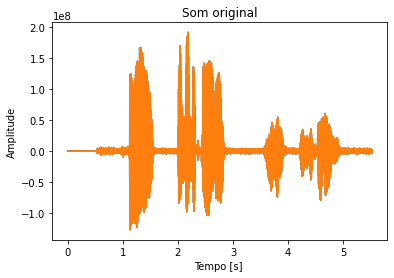

In [147]:
samplerate, data = read(url)
duration = len(data)/samplerate
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/samplerate)

def visualize(sample, time):
  plt.title("Som original")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.plot(time, data)
  plt.show()
visualize(data, time)


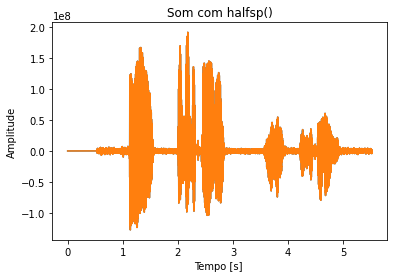

In [148]:
result=halfsp(sample = data)

duration = len(data)/samplerate
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/samplerate)

def visualize(sample, time):
  plt.title("Som com halfsp()")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.plot(time, data)
  plt.show()

visualize(result, time)


In [149]:
result=doublesp(sample = data)

duration = len(data)/samplerate
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/samplerate)

def visualize(sample, time):
  plt.title("Som com doublesp()")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.plot(time, data)
  plt.show()

visualize(result, time)


KeyboardInterrupt: ignored

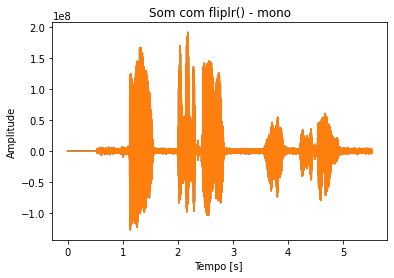

In [151]:
result=np.fliplr(data)

duration = len(data)/samplerate
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/samplerate)

def visualize(sample, time):
  plt.title("Som com fliplr() - mono")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.plot(time, data)
  plt.show()

visualize(result, time)

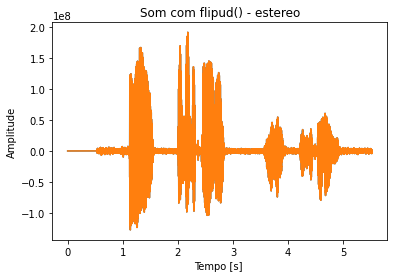

In [152]:
result=np.flipud(data)

duration = len(data)/samplerate
#parametros: (inicio, final, step)
time = np.arange(0, duration, 1/samplerate)

def visualize(sample, time):
  plt.title("Som com flipud() - estereo")
  plt.xlabel("Tempo [s] ")
  plt.ylabel("Amplitude")
  plt.plot(time, data)
  plt.show()

visualize(result, time)

8) Crie uma função que gere um modelo discreto de um sinal de eco $s_e(t)=\alpha s(t-T)$, onde $\alpha$ é o fator de atenuação, $T$, o atraso (em segundos) e $s(t)$, o sinal original. Assuma que $0 \leq \alpha \leq 1$ e que $T \geq 0$. O sinal resultante, com eco, é $r(t)=s(t)+s_e(t)$.

Gere sinais com eco a partir de uma gravação de voz (teste antes com um ou dois impulsos para verificar seu código). Experimente com diferentes valores de atenuação e atraso (teste, por exemplo, com fator de atenuação de 0,65 e atraso de 250 ms). Qual o impacto sobre o sinal sintetizado?

In [153]:
def echo(signal, attenuation: float, delay: float, Fs: int):
  ###delay do sinal
  delayer = np.zeros(math.ceil (delay * Fs))
  ###fator de atenuacao do sinal
  #The attenuation factor is the ratio of the amplitude of the reflected sound to the original sound
  attSig = attenuation*signal
  #adicionando a atenuacao ao delay
  delSin = np.append(delayer,attSig)
  #adicionando o delay ao sinal
  sig = np.append(signal,delayer)
  return sig+delSin

In [154]:
samplerate, data = read(url)
data_digital = np.array(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


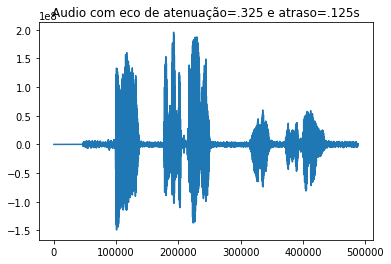

In [155]:
echo1 = echo(signal = data_digital, attenuation = .325, delay = .125, Fs = 8000)
plt.plot(echo1)
plt.title('Audio com eco de atenuação=.325 e atraso=.125s')
plt.show()

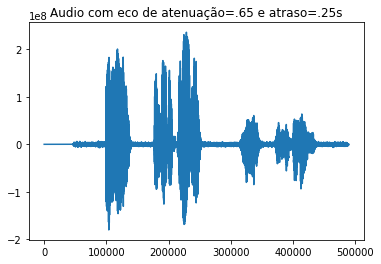

In [156]:
echo2 = echo(signal = data_digital, attenuation = .65, delay = .25, Fs = 8000)
plt.plot(echo2)
plt.title('Audio com eco de atenuação=.65 e atraso=.25s')
plt.show()

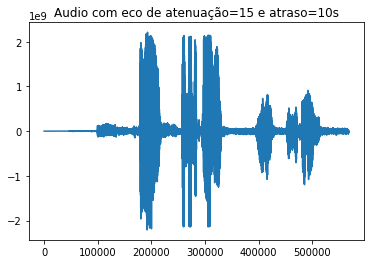

In [157]:
echo3 = echo(signal = data_digital, attenuation = 15, delay = 10, Fs = 8000)
plt.plot(echo3)
plt.title('Audio com eco de atenuação=15 e atraso=10s')
plt.show()

9) Acesse o banco de respostas ao impulso de ambientes em http://www.openairlib.net, link IR Data. Observe que as respostas são longas, geralmente maiores que 2 segundos.

Escolha uma resposta, baixe o arquivo e faça a operação de convolução do trecho de voz que você gravou com essa resposta de ambiente (certifique-se que as frequências de amostragem são as mesmas) usando `numpy.convolve`. Se as frequências de amostragem forem diferentes, você pode reamostrar um dos arquivos (áudio ou resposta) no Ocenaudio.

(opcional)Meça o tempo de processamento para vários tamanhos de resposta, usando uma das formas descritas em https://cmdlinetips.com/2018/01/two-ways-to-compute-executing-time-in-python/. Faça um gráfico do tempo de processamento em função do tamanho da resposta (entre 100 ms e 3 s, com pelo menos 5 pontos; para fazer isso, você irá cortar a resposta). Comente.